In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Ensemble_Online_Learner import BaseLearner, EnsembleOnlineLearner, ErrorDetector
%matplotlib inline

# Prepare the dataset

In [2]:
num_observations = 500
num_reliable_instances = 200
num_features = 5
# Training data `X`
X = np.random.multivariate_normal(np.ones(num_features), np.eye(num_features), size = num_observations)
# The labels given by experts
expert_database = np.random.randint(low = 0, high = 2, size = num_observations) * 2 - 1
# Reliable dataset used to pretrain a Logistic Regression model.
X_reliable = np.random.multivariate_normal(np.ones(num_features), np.eye(num_features), size = num_reliable_instances)
y_reliable = np.random.randint(low = 0, high = 2, size = num_reliable_instances) * 2 - 1

# Initialize the learner

In [3]:
# Construct the base learners
num_base_learners = 11
base_learners_collection = [BaseLearner(i * 0.1) for i in range(num_base_learners)]
# Initialize `EnsembleOnlineLearner`
example_learner = EnsembleOnlineLearner(X_reliable, y_reliable, base_learners_collection, correction_parameter = 0)

# Training

In [4]:
example_learner.training(X, expert_database, learning_rate = 0.05)

# Plot the misclassification rate curve

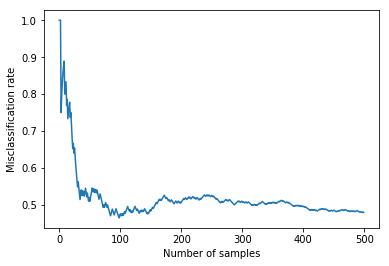

In [5]:
example_learner.plot_error_rate_curve()

# Check the weights

In [6]:
example_learner.weight

array([0.16057128, 0.15274012, 0.06528341, 0.05907087, 0.1452909 ,
       0.0620995 , 0.08382556, 0.04836314, 0.03241878, 0.12505304,
       0.06528341])